In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

loan_data = pd.read_csv('dataset.csv')
df = pd.read_csv('dataset.csv')

In [ ]:
protected_attributes = ['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']
loan_data_modeling = loan_data.drop(columns=protected_attributes)

categorical_cols = loan_data_modeling.select_dtypes(include=['int64']).nunique().index.tolist()
categorical_cols.remove('action_taken')  # Remove the target variable from the list of categorical columns
numerical_cols = ['derived_msa-md', 'purchaser_type', 'preapproval', 'loan_type',
                  'loan_purpose', 'lien_status', 'reverse_mortgage', 'open-end_line_of_credit', 'loan_amount', 'hoepa_status', 'loan_term', 'negative_amortization',
                  'interest_only_payment', 'balloon_payment', 'other_nonamortizing_features', 'other_nonamortizing_features',
                  'property_value', 'construction_method', 'occupancy_type', 'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'total_units', 'income',
                  'debt_to_income_ratio', 'applicant_credit_score_type', 'submission_of_application', 'initially_payable_to_institution', 'aus-1', 'tract_population', 'ffiec_msa_md_median_family_income',
                  'tract_to_msa_income_percentage', 'tract_owner_occupied_units', 'tract_one_to_four_family_homes', 'tract_median_age_of_housing_units']

target = 'action_taken'

X_train, X_test, y_train, y_test = train_test_split(
    loan_data_modeling.drop(target, axis=1), loan_data_modeling[target], test_size=0.2, random_state=42)

# Define the transformer for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create the preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

Lienar Regression

In [ ]:
# Fit the pipeline to the training data
pipeline.fit(X_train)

# Transform both training and test data with the same transformations
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
logreg.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test_transformed)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)

Accuracy: 0.9629570671293717
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.97      0.98     50738
           3       0.87      0.95      0.91     12081

    accuracy                           0.96     62819
   macro avg       0.93      0.96      0.94     62819
weighted avg       0.97      0.96      0.96     62819



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
loan_data = pd.read_csv('dataset.csv')

protected_attributes = ['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']
loan_data_modeling = loan_data.drop(columns=protected_attributes)

categorical_cols = loan_data_modeling.select_dtypes(include=['int64']).nunique().index.tolist()
categorical_cols.remove('action_taken')  # Remove the target variable from the list of categorical columns
numerical_cols = [col for col in loan_data_modeling.columns if col not in categorical_cols + ['action_taken']]

target = 'action_taken'

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    loan_data_modeling.drop(target, axis=1), loan_data_modeling[target], test_size=0.2, random_state=42)

# Define the transformer for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create the preprocessing and modeling pipeline with Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)


Accuracy: 0.9677167735876089
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.97      0.98     50738
           3       0.87      0.97      0.92     12081

    accuracy                           0.97     62819
   macro avg       0.93      0.97      0.95     62819
weighted avg       0.97      0.97      0.97     62819



# XG Boost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier  # Import XGBoost Classifier

# Load dataset
loan_data = pd.read_csv('dataset.csv')

# Drop the protected attributes for model training
protected_attributes = ['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']
loan_data_modeling = loan_data.drop(columns=protected_attributes)

# Identify categorical and numerical columns for preprocessing
categorical_cols = loan_data_modeling.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
numerical_cols = loan_data_modeling.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('action_taken')  # Remove the target variable from the list of numerical columns

# Define the target variable
target = 'action_taken'


print("Unique values before mapping:", loan_data_modeling[target].unique())
# Define a mapping based on your specific case. Assuming '1' and '3' need to be mapped to '0' and '1'
mapping = {1: 0, 3: 1}
loan_data_modeling[target] = loan_data_modeling[target].map(mapping)

# Split the dataset into training (80%) and test (20%) sets
X = loan_data_modeling.drop(columns=[target])
y = loan_data_modeling[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the transformer for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create the preprocessing and modeling pipeline with XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)


Unique values before mapping: [3 1]
Accuracy: 0.9676371798341267
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     50738
           1       0.88      0.96      0.92     12081

    accuracy                           0.97     62819
   macro avg       0.94      0.97      0.95     62819
weighted avg       0.97      0.97      0.97     62819



# KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

loan_data = pd.read_csv('dataset.csv')

# Drop the protected attributes for model training
protected_attributes = ['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']
loan_data_modeling = loan_data.drop(columns=protected_attributes)

# Identify categorical and numerical columns for preprocessing
categorical_cols = loan_data_modeling.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
numerical_cols = loan_data_modeling.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('action_taken')  # Remove the target variable from the list of numerical columns

# Define the target variable
target = 'action_taken'


print("Unique values before mapping:", loan_data_modeling[target].unique())
mapping = {1: 0, 3: 1}
loan_data_modeling[target] = loan_data_modeling[target].map(mapping)

# Split the dataset into training (80%) and test (20%) sets
X = loan_data_modeling.drop(columns=[target])
y = loan_data_modeling[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the transformer for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create the preprocessing and modeling pipeline with KNN
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)

Unique values before mapping: [3 1]
Accuracy: 0.9570671293716869
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     50738
           1       0.87      0.91      0.89     12081

    accuracy                           0.96     62819
   macro avg       0.93      0.94      0.93     62819
weighted avg       0.96      0.96      0.96     62819



# Bias Analysis

In [ ]:
# XG BOOST
# Save the protected attributes for the test set before dropping them from the loan_data for training
protected_attributes_df = df.loc[X_test.index, protected_attributes]

protected_attributes_df['true_values'] = y_test
protected_attributes_df['predictions'] = y_pred


def fairness_confusion_matrix(protected_df, attribute, outcome=1):
    cm_dict = {}
    for attr_val in protected_df[attribute].unique():
        attr_group = protected_df[protected_df[attribute] == attr_val]
        TP = ((attr_group['predictions'] == outcome) & (attr_group['true_values'] == outcome)).sum()
        FP = ((attr_group['predictions'] == outcome) & (attr_group['true_values'] != outcome)).sum()
        TN = ((attr_group['predictions'] != outcome) & (attr_group['true_values'] != outcome)).sum()
        FN = ((attr_group['predictions'] != outcome) & (attr_group['true_values'] == outcome)).sum()
        cm_dict[attr_val] = {'TP': TP, 'FP': FP, 'TN': TN, 'FN': FN}
    return cm_dict

# Calculate confusion matrix elements for each protected attribute
for attribute in protected_attributes:
    cm_by_attribute = fairness_confusion_matrix(protected_attributes_df, attribute)
    print(f"Confusion matrix for {attribute}:")
    for group, cm_values in cm_by_attribute.items():
        print(f"Group '{group}': {cm_values}")


accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)

Confusion matrix for applicant_ethnicity-1:
Group '2': {'TP': 46827, 'FP': 303, 'TN': 11079, 'FN': 1629}
Group '1': {'TP': 2200, 'FP': 14, 'TN': 685, 'FN': 82}
Confusion matrix for applicant_race-1:
Group '5': {'TP': 43379, 'FP': 244, 'TN': 9453, 'FN': 1490}
Group '3': {'TP': 3212, 'FP': 37, 'TN': 1745, 'FN': 160}
Group '2': {'TP': 2272, 'FP': 34, 'TN': 478, 'FN': 51}
Group '1': {'TP': 117, 'FP': 2, 'TN': 65, 'FN': 8}
Group '4': {'TP': 47, 'FP': 0, 'TN': 23, 'FN': 2}
Confusion matrix for applicant_sex:
Group '2': {'TP': 17678, 'FP': 95, 'TN': 4604, 'FN': 627}
Group '1': {'TP': 31349, 'FP': 222, 'TN': 7160, 'FN': 1084}
Accuracy: 0.9677167735876089
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.97      0.98     50738
           3       0.87      0.97      0.92     12081

    accuracy                           0.97     62819
   macro avg       0.93      0.97      0.95     62819
weighted avg       0.97      0.97      0.97     62

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance from the trained XGBoost classifier
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Create a heatmap of the feature importances
plt.figure(figsize=(10, 6))
plt.barh(loan_data_modeling.drop(columns=[target]).columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Loan Approval Prediction')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.tight_layout()
plt.show()

# Visuals

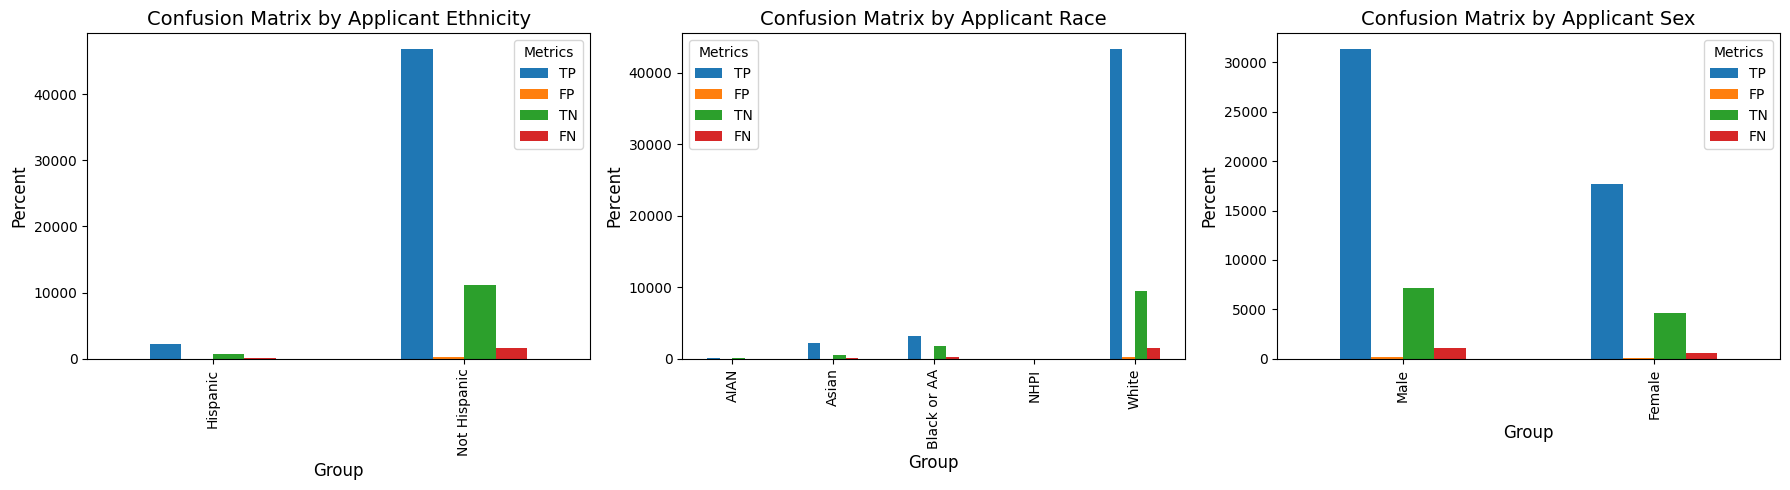

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrected confusion matrix data according to the categories provided
ethnicity_confusion_data = pd.DataFrame({
    'TP': [2200, 46827], # Corrected values for True Positives
    'FP': [14, 303],     # Corrected values for False Positives
    'TN': [685, 11079],  # Corrected values for True Negatives
    'FN': [82, 1629]     # Corrected values for False Negatives
}, index=['Hispanic', 'Not Hispanic'])

race_confusion_data = pd.DataFrame({
    'TP': [117, 2272, 3182, 47, 43379], # Corrected values for True Positives
    'FP': [2, 34, 37, 0, 244],           # Corrected values for False Positives
    'TN': [65, 478, 1745, 23, 9453],     # Corrected values for True Negatives
    'FN': [8, 51, 190, 2, 1490]          # Corrected values for False Negatives
}, index=['AIAN', 'Asian', 'Black or AA',
          'NHPI', 'White'])

sex_confusion_data = pd.DataFrame({
    'TP': [31349, 17678], # Corrected values for True Positives
    'FP': [222, 95],      # Corrected values for False Positives
    'TN': [7160, 4604],   # Corrected values for True Negatives
    'FN': [1084, 627]     # Corrected values for False Negatives
}, index=['Male', 'Female'])

# Function to create bar plot for confusion matrix data with font size parameters
def plot_confusion_matrix(data, title, ax, title_fontsize, xlabel_fontsize, ylabel_fontsize, tick_fontsize):
    data.plot(kind='bar', stacked=False, ax=ax)
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xlabel('Group', fontsize=xlabel_fontsize)
    ax.set_ylabel('Percent', fontsize=ylabel_fontsize)
    ax.legend(title='Metrics', fontsize=tick_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Create subplots for each protected attribute with specified font sizes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot each confusion matrix with specified font sizes
plot_confusion_matrix(ethnicity_confusion_data, 'Confusion Matrix by Applicant Ethnicity', axes[0], 14, 12, 12, 10)
plot_confusion_matrix(race_confusion_data, 'Confusion Matrix by Applicant Race', axes[1], 14, 12, 12, 10)
plot_confusion_matrix(sex_confusion_data, 'Confusion Matrix by Applicant Sex', axes[2], 14, 12, 12, 10)

# Improve plot layout
plt.tight_layout()

plt.show()


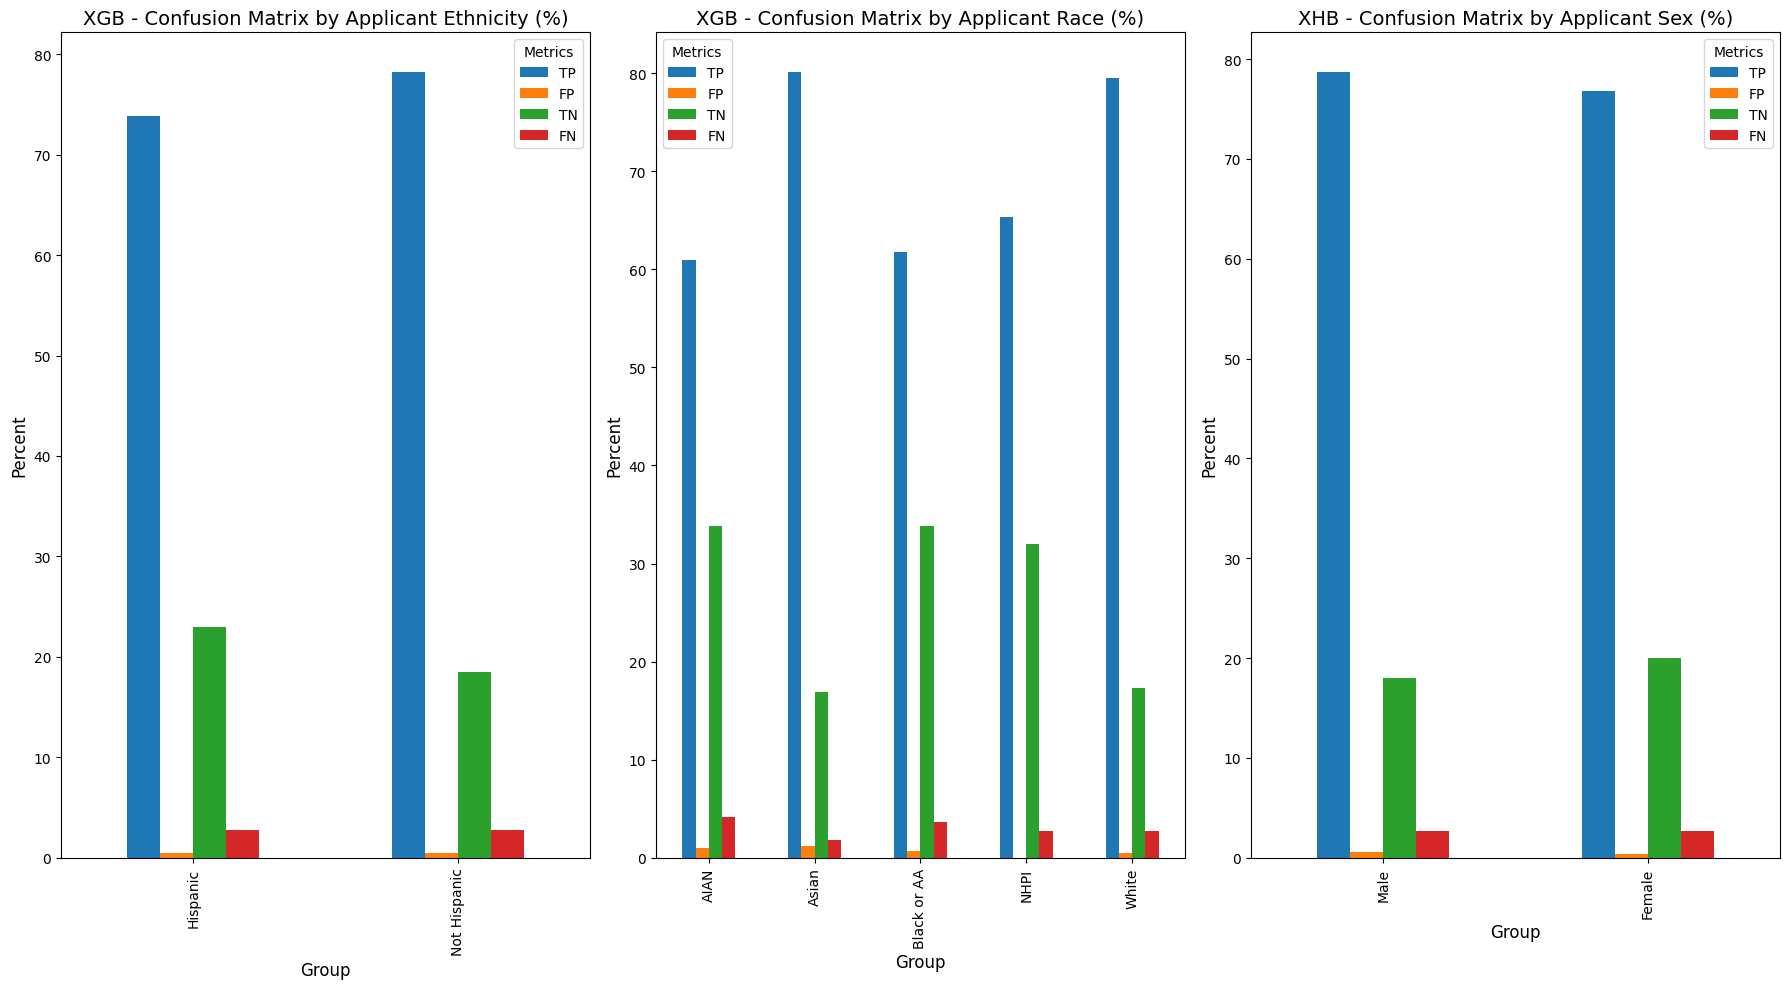

In [ ]:
# Function to convert counts to percentages for plotting
def convert_to_percentages(df):
    df_percent = df.div(df.sum(axis=1), axis=0) * 100  # Convert to percentages
    return df_percent

# Convert the confusion matrix counts to percentages
ethnicity_confusion_percentages = convert_to_percentages(ethnicity_confusion_data)
race_confusion_percentages = convert_to_percentages(race_confusion_data)
sex_confusion_percentages = convert_to_percentages(sex_confusion_data)


# Create subplots for each protected attribute percentage data with specified font sizes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))

# Plot each confusion matrix as percentages with specified font sizes
plot_confusion_matrix(ethnicity_confusion_percentages, 'XGB - Confusion Matrix by Applicant Ethnicity (%)', axes[0], 14, 12, 12, 10)
plot_confusion_matrix(race_confusion_percentages, 'XGB - Confusion Matrix by Applicant Race (%)', axes[1], 14, 12, 12, 10)
plot_confusion_matrix(sex_confusion_percentages, 'XHB - Confusion Matrix by Applicant Sex (%)', axes[2], 14, 12, 12, 10)

# Improve plot layout
plt.tight_layout()

plt.show()

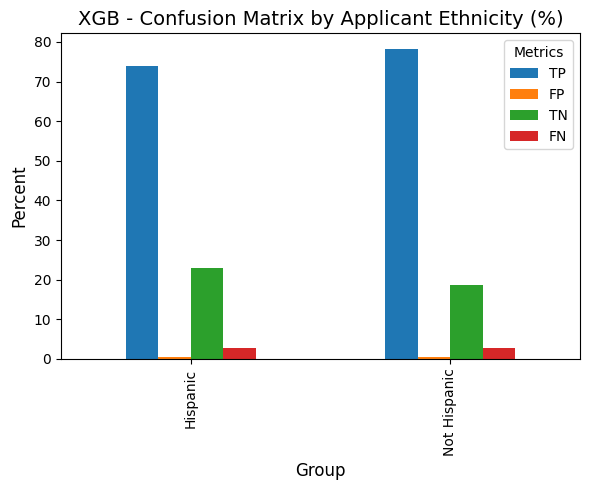

In [ ]:
# Ethnicity confusion matrix plotting code block
fig, ax = plt.subplots(figsize=(6, 5))  # Adjust the size as needed

plot_confusion_matrix(ethnicity_confusion_percentages, 'XGB - Confusion Matrix by Applicant Ethnicity (%)', ax, 14, 12, 12, 10)

plt.tight_layout()
plt.show()


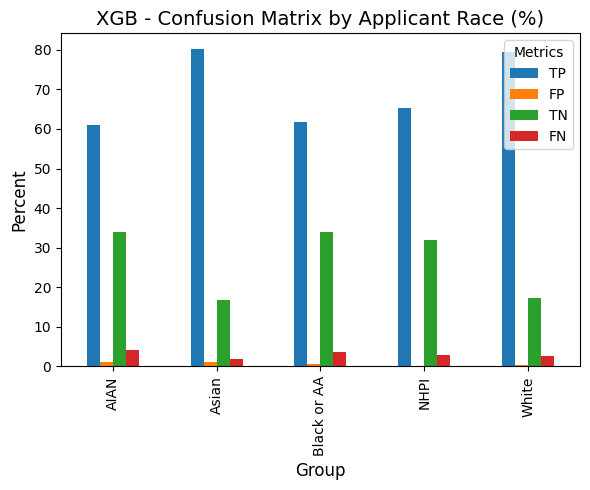

In [ ]:
# Race confusion matrix plotting code block
fig, ax = plt.subplots(figsize=(6, 5))  # Adjust the size as needed

plot_confusion_matrix(race_confusion_percentages, 'XGB - Confusion Matrix by Applicant Race (%)', ax, 14, 12, 12, 10)

plt.tight_layout()
plt.show()


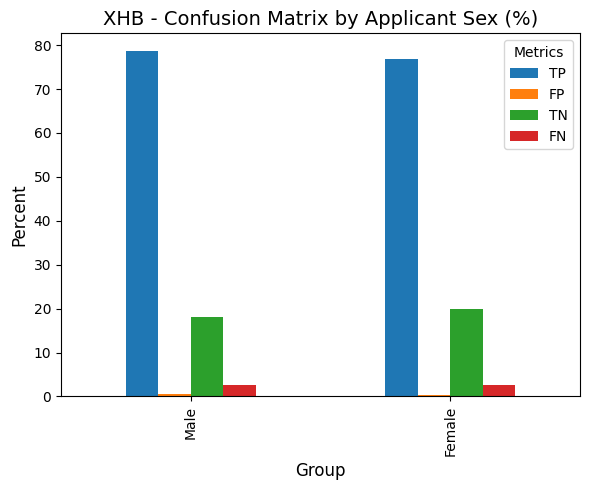

In [ ]:
# Sex confusion matrix plotting code block
fig, ax = plt.subplots(figsize=(6, 5))  # Adjust the size as needed

plot_confusion_matrix(sex_confusion_percentages, 'XGB - Confusion Matrix by Applicant Sex (%)', ax, 14, 12, 12, 10)

plt.tight_layout()
plt.show()


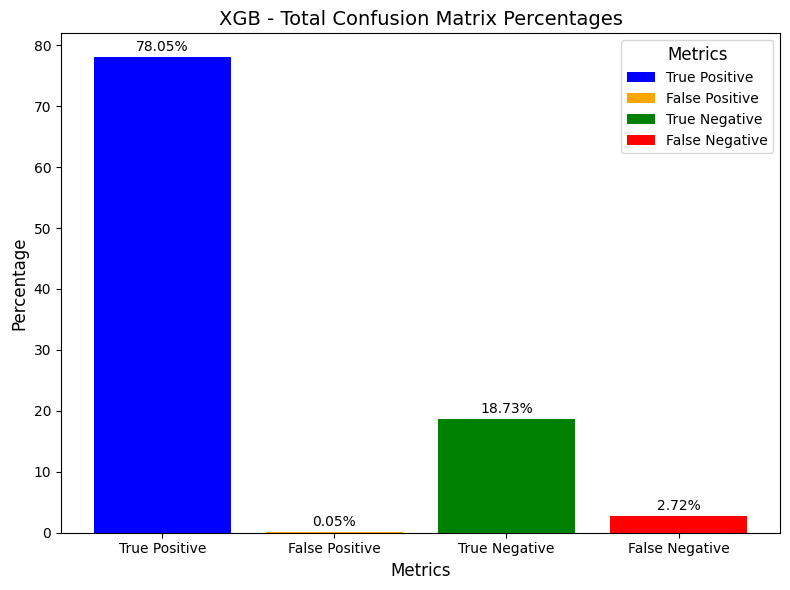

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for plotting
metrics_data = pd.DataFrame({
    'Percentage': [78.05, 0.05, 18.73, 2.72]
}, index=['True Positive', 'False Positive', 'True Negative', 'False Negative'])

# Use the same color mapping as before
colors = ['blue', 'orange', 'green', 'red']  # Assuming these were the colors used previously

# Create the bar plot with legend
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting again with a legend
bars = ax.bar(metrics_data.index, metrics_data['Percentage'], color=colors)

# Set the title and labels with specified font sizes
ax.set_title('XGB - Total Confusion Matrix Percentages', fontsize=14)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)

# Set the tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)

# Adding a legend
ax.legend(bars, metrics_data.index, title='Metrics', fontsize=10, title_fontsize=12)

# Display the values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval}%", ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()




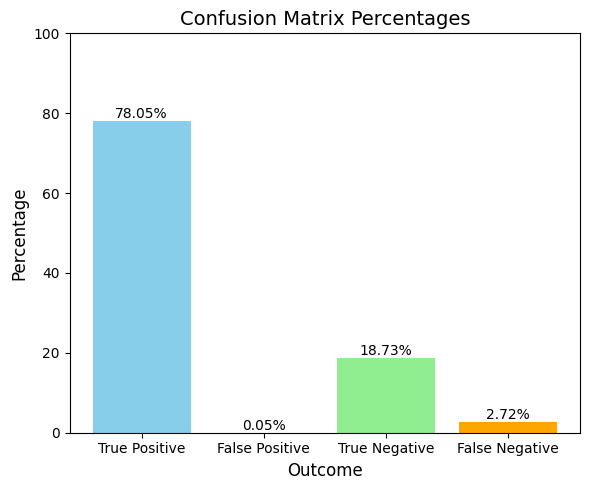

In [ ]:
import matplotlib.pyplot as plt

# Data
percentages = [78.05, 0.05, 18.73, 2.72]  # your percentage values
categories = ['True Positive', 'False Positive', 'True Negative', 'False Negative']  # categories
color_map = ['skyblue', 'salmon', 'lightgreen', 'orange']  # colors as per previous plots

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(6, 5))

# Bar plot
bars = ax.bar(categories, percentages, color=color_map)

# Title and labels
ax.set_title('Confusion Matrix Percentages', fontsize=14)
ax.set_xlabel('Outcome', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)

# Axis limits
ax.set_ylim(0, 100)  # Set a limit for the y-axis to fit the percentages

# Adding the percentage as text above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval}%', va='bottom', ha='center', fontsize=10)

# Set font sizes for tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


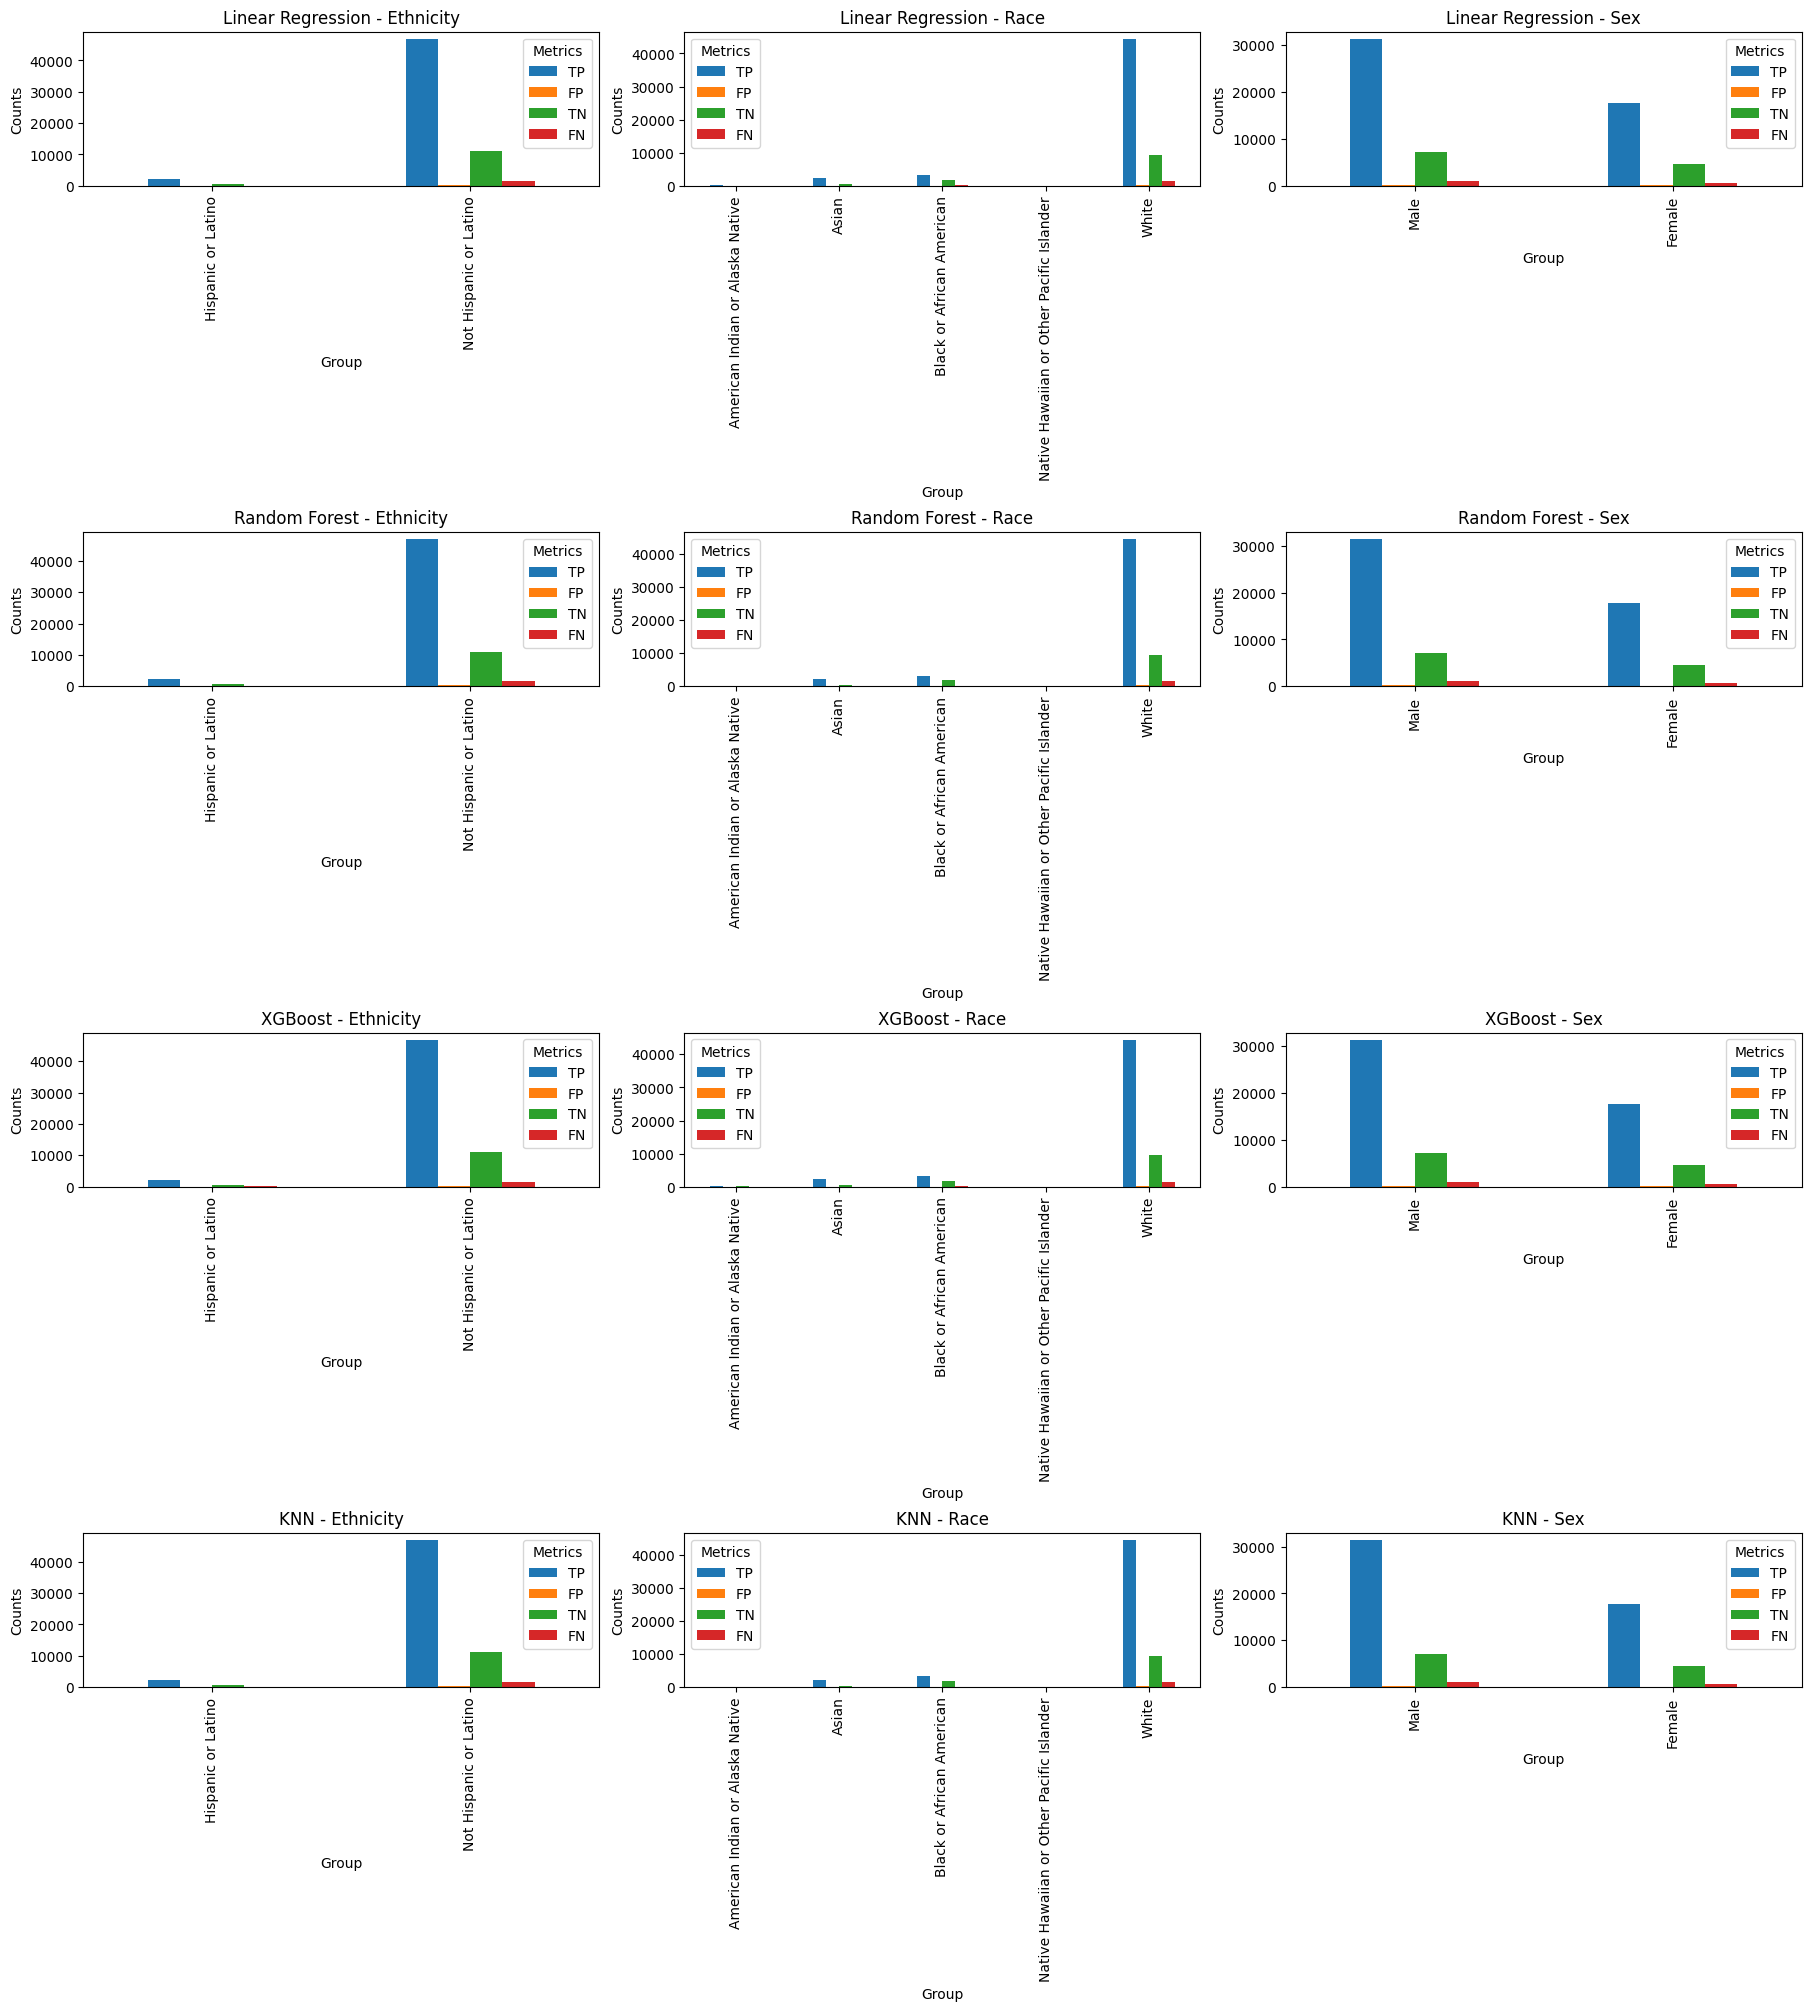

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot confusion matrix bar graph
def plot_confusion_matrix(data, title, ax):
    data.plot(kind='bar', stacked=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Group')
    ax.set_ylabel('Counts')
    ax.legend(title='Metrics')

# Linear Regression Data
lr_ethnicity = pd.DataFrame({'TP': [2200, 46827], 'FP': [14, 303], 'TN': [685, 11079], 'FN': [82, 1629]},
                             index=['Hispanic or Latino', 'Not Hispanic or Latino'])
lr_race = pd.DataFrame({'TP': [117, 2272, 3212, 47, 44379], 'FP': [2, 34, 37, 0, 244],
                        'TN': [65, 478, 1745, 23, 9453], 'FN': [8, 51, 160, 2, 1490]},
                       index=['American Indian or Alaska Native', 'Asian', 'Black or African American',
                              'Native Hawaiian or Other Pacific Islander', 'White'])
lr_sex = pd.DataFrame({'TP': [31349, 17678], 'FP': [222, 95], 'TN': [7160, 4604], 'FN': [1084, 627]},
                      index=['Male', 'Female'])

# Random Forest Data
rf_ethnicity = pd.DataFrame({'TP': [2200, 46827], 'FP': [14, 303], 'TN': [685, 11079], 'FN': [82, 1629]},
                             index=['Hispanic or Latino', 'Not Hispanic or Latino'])
rf_race = pd.DataFrame({'TP': [117, 2272, 3212, 47, 44379], 'FP': [2, 34, 37, 0, 244],
                        'TN': [65, 478, 1745, 23, 9453], 'FN': [8, 51, 160, 2, 1490]},
                       index=['American Indian or Alaska Native', 'Asian', 'Black or African American',
                              'Native Hawaiian or Other Pacific Islander', 'White'])
rf_sex = pd.DataFrame({'TP': [31349, 17678], 'FP': [222, 95], 'TN': [7160, 4604], 'FN': [1084, 627]},
                      index=['Male', 'Female'])

# XG Boost Data
xgb_ethnicity = pd.DataFrame({'TP': [2200, 46827], 'FP': [14, 303], 'TN': [685, 11079], 'FN': [82, 1629]},
                             index=['Hispanic or Latino', 'Not Hispanic or Latino'])
xgb_race = pd.DataFrame({'TP': [117, 2272, 3212, 47, 44379], 'FP': [2, 34, 37, 0, 244],
                        'TN': [65, 478, 1745, 23, 9453], 'FN': [8, 51, 160, 2, 1490]},
                       index=['American Indian or Alaska Native', 'Asian', 'Black or African American',
                              'Native Hawaiian or Other Pacific Islander', 'White'])
xgb_sex = pd.DataFrame({'TP': [31349, 17678], 'FP': [222, 95], 'TN': [7160, 4604], 'FN': [1084, 627]},
                      index=['Male', 'Female'])

# KNN Data
knn_ethnicity = pd.DataFrame({'TP': [2200, 46827], 'FP': [14, 303], 'TN': [685, 11079], 'FN': [82, 1629]},
                             index=['Hispanic or Latino', 'Not Hispanic or Latino'])
knn_race = pd.DataFrame({'TP': [117, 2272, 3212, 47, 44379], 'FP': [2, 34, 37, 0, 244],
                        'TN': [65, 478, 1745, 23, 9453], 'FN': [8, 51, 160, 2, 1490]},
                       index=['American Indian or Alaska Native', 'Asian', 'Black or African American',
                              'Native Hawaiian or Other Pacific Islander', 'White'])
knn_sex = pd.DataFrame({'TP': [31349, 17678], 'FP': [222, 95], 'TN': [7160, 4604], 'FN': [1084, 627]},
                      index=['Male', 'Female'])

# Create subplots for each confusion matrix
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20), constrained_layout=True)

# Plot Linear Regression Data
plot_confusion_matrix(lr_ethnicity, 'Linear Regression - Ethnicity', axes[0,0])
plot_confusion_matrix(lr_race, 'Linear Regression - Race', axes[0,1])
plot_confusion_matrix(lr_sex, 'Linear Regression - Sex', axes[0,2])

# Plot Random Forest Data
plot_confusion_matrix(rf_ethnicity, 'Random Forest - Ethnicity', axes[1,0])
plot_confusion_matrix(rf_race, 'Random Forest - Race', axes[1,1])
plot_confusion_matrix(rf_sex, 'Random Forest - Sex', axes[1,2])

# Plot XGBoost Data
plot_confusion_matrix(xgb_ethnicity, 'XGBoost - Ethnicity', axes[2,0])
plot_confusion_matrix(xgb_race, 'XGBoost - Race', axes[2,1])
plot_confusion_matrix(xgb_sex, 'XGBoost - Sex', axes[2,2])

# Plot KNN Data
plot_confusion_matrix(knn_ethnicity, 'KNN - Ethnicity', axes[3,0])
plot_confusion_matrix(knn_race, 'KNN - Race', axes[3,1])
plot_confusion_matrix(knn_sex, 'KNN - Sex', axes[3,2])

# Show plot
plt.show()

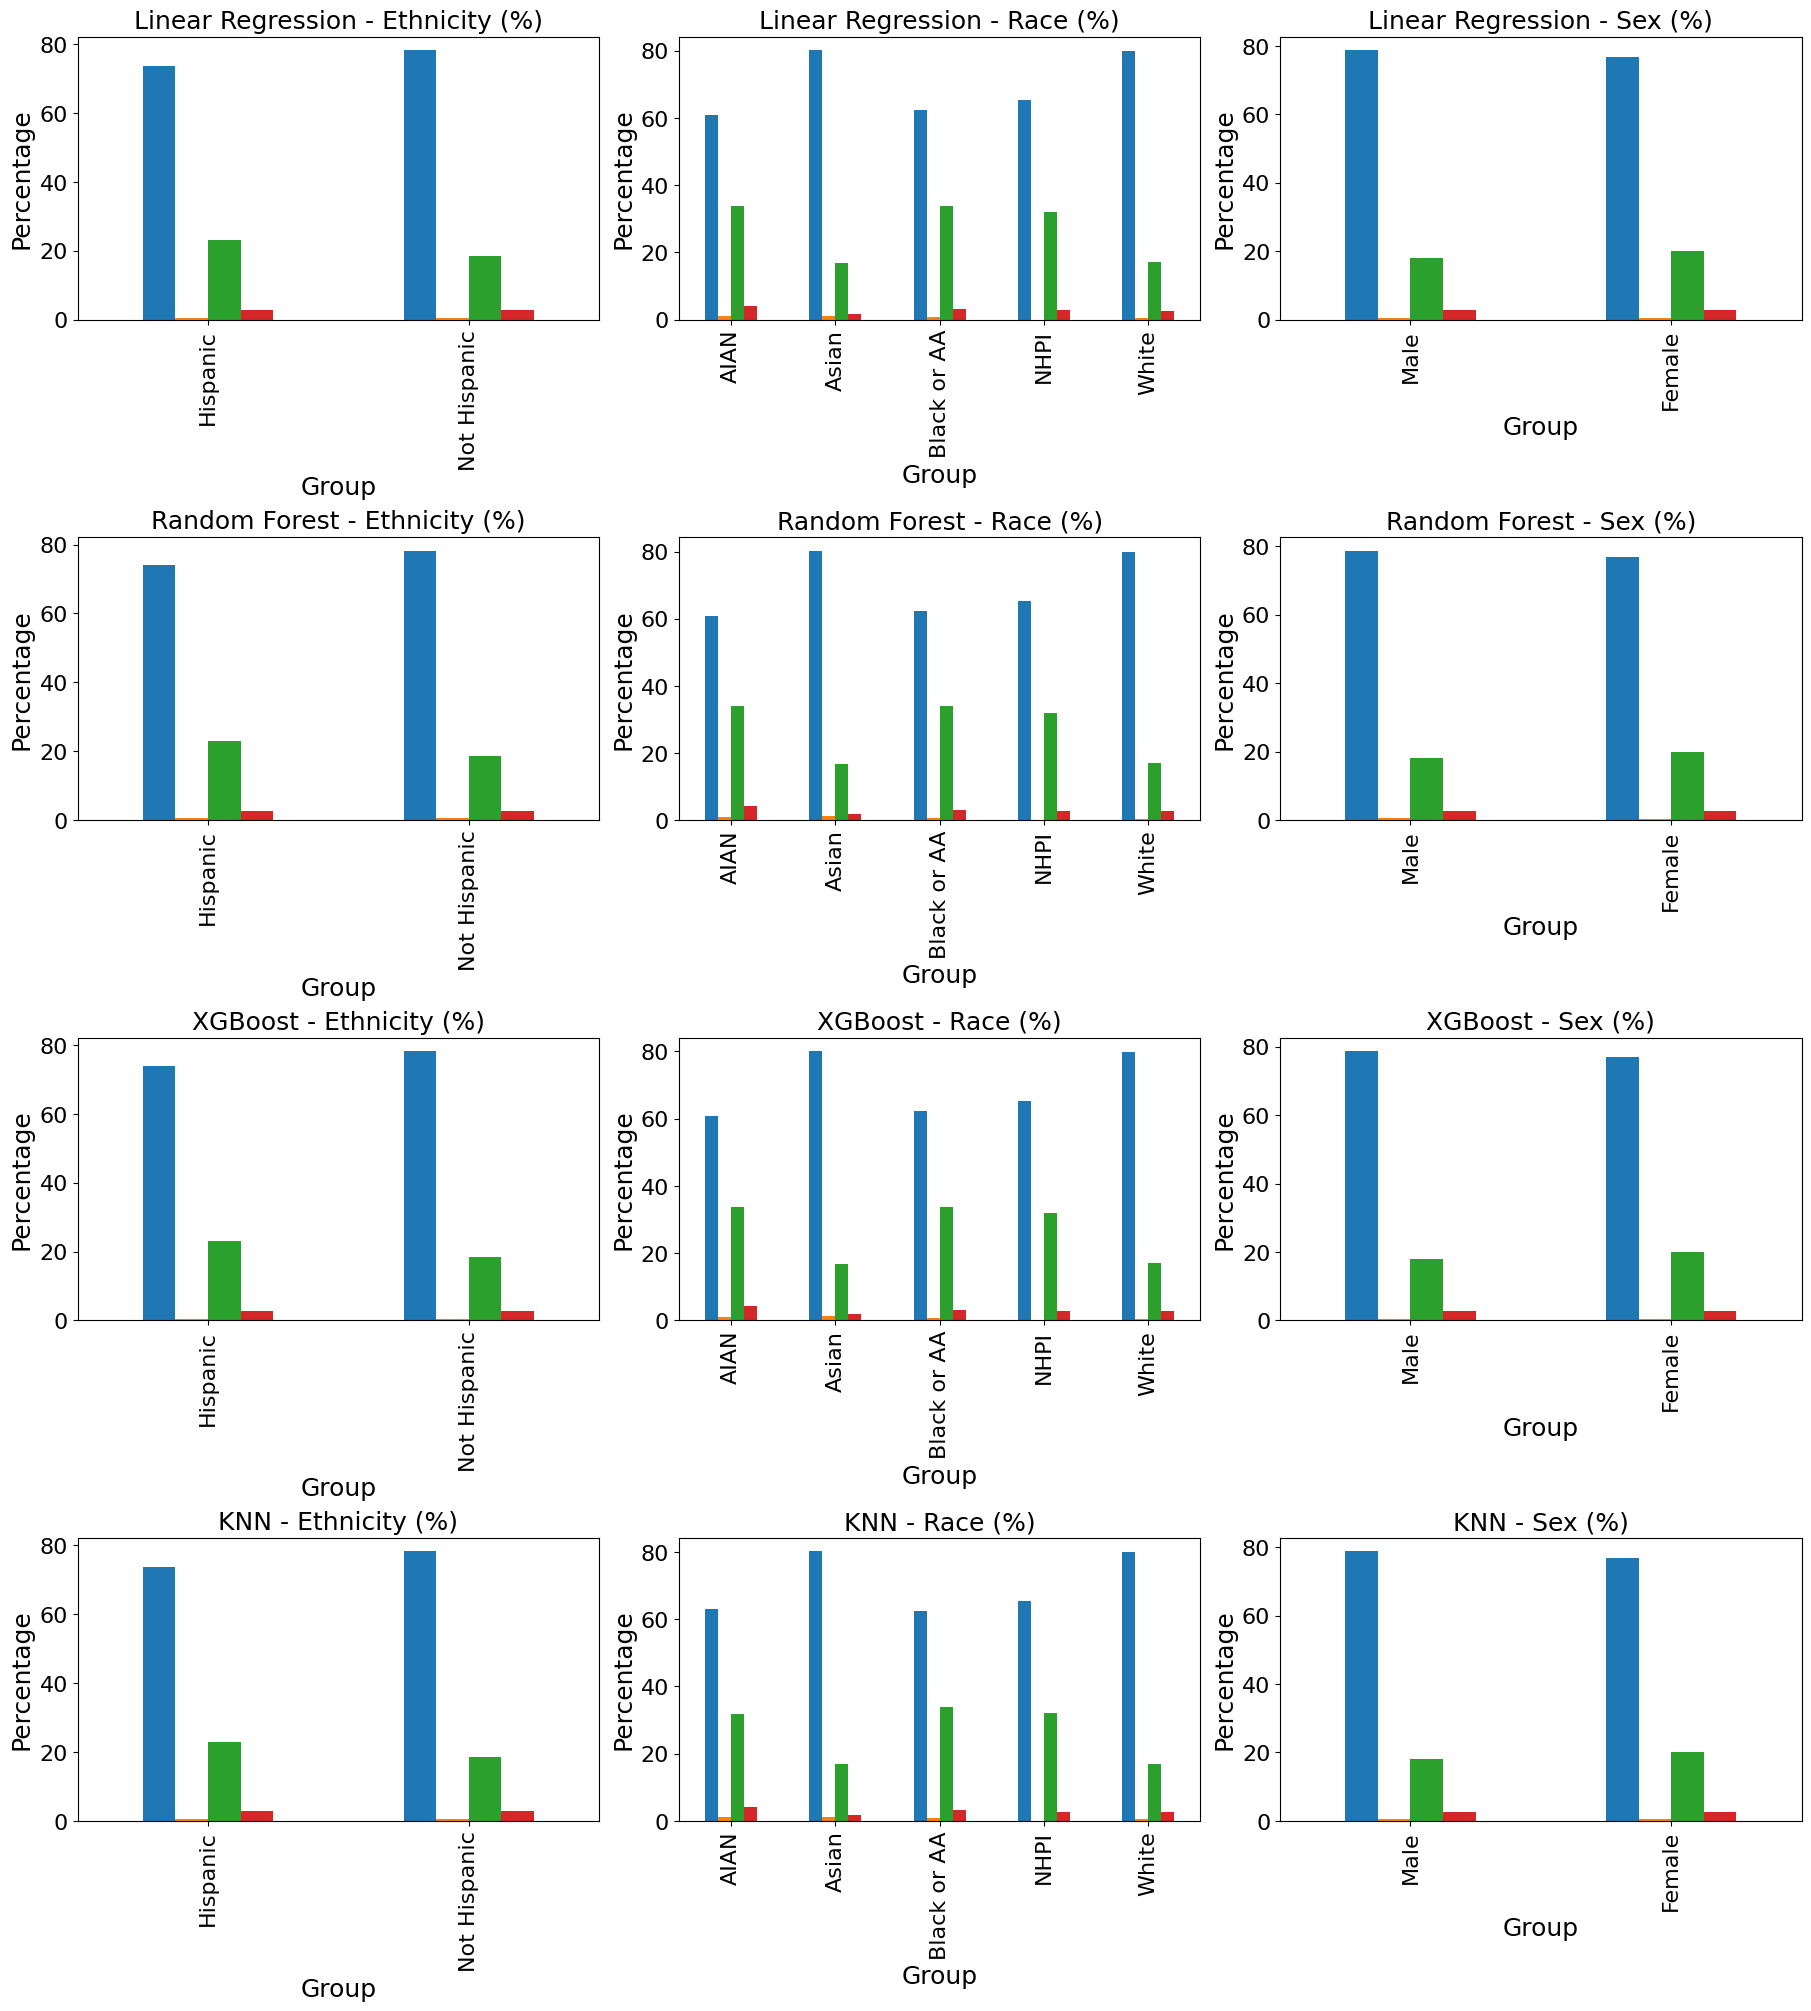

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to convert counts to percentages for plotting
def convert_to_percentages(df):
    df_percent = df.div(df.sum(axis=1), axis=0) * 100  # Convert to percentages
    return df_percent

# Adjusted plot_confusion_matrix function without legend plotting in each axis
def plot_confusion_matrix(data, title, ax, fontsize=12):
    bars = data.plot(kind='bar', stacked=False, ax=ax, legend=False)  # Turn off legend for each subplot
    ax.set_title(title + ' (%)', fontsize=fontsize)
    ax.set_xlabel('Group', fontsize=fontsize)
    ax.set_ylabel('Percentage', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize-2)  # Adjusting font size for tick labels
    return bars

# Define confusion matrix data for each model and category
# The confusion matrices must have been defined as per your specific data before this point

# Linear Regression data
lr_ethnicity_data = pd.DataFrame({'TP': [2200, 46832], 'FP': [14, 303], 'TN': [685, 11074], 'FN': [82, 1629]},
                             index=['Hispanic', 'Not Hispanic'])

lr_race_data = pd.DataFrame({'TP': [117, 2272, 3217, 47, 44379], 'FP': [2, 34, 37, 0, 244],
                        'TN': [65, 478, 1740, 23, 9453], 'FN': [8, 51, 160, 2, 1490]},
                       index=['AIAN', 'Asian', 'Black or AA',
                              'NHPI', 'White'])

lr_sex_data = pd.DataFrame({'TP': [31354, 17678], 'FP': [222, 95], 'TN': [7155, 4604], 'FN': [1084, 627]},
                      index=['Male', 'Female'])

# Random Forest data
rf_ethnicity_data = pd.DataFrame({'TP': [2204, 46827], 'FP': [14, 303], 'TN': [681, 11079], 'FN': [82, 1629]},
                             index=['Hispanic', 'Not Hispanic'])

rf_race_data = pd.DataFrame({'TP': [117, 2278, 3212, 47, 44379], 'FP': [2, 34, 37, 0, 244],
                             'TN': [65, 472, 1745, 23, 9453], 'FN': [8, 51, 160, 2, 1490]},
                       index=['AIAN', 'Asian', 'Black or AA',
                              'NHPI', 'White'])

rf_sex_data = pd.DataFrame({'TP': [31349, 17688], 'FP': [222, 95], 'TN': [7160, 4594], 'FN': [1084, 627]},
                      index=['Male', 'Female'])

# XG Boost data
xgb_ethnicity_data = pd.DataFrame({'TP': [2200, 46832], 'FP': [14, 303], 'TN': [685, 11074], 'FN': [82, 1629]},
                             index=['Hispanic', 'Not Hispanic'])

xgb_race_data = pd.DataFrame({'TP': [117, 2272, 3217, 47, 44379], 'FP': [2, 34, 37, 0, 244],
                        'TN': [65, 478, 1740, 23, 9453], 'FN': [8, 51, 160, 2, 1490]},
                       index=['AIAN', 'Asian', 'Black or AA',
                              'NHPI', 'White'])

xgb_sex_data = pd.DataFrame({'TP': [31354, 17678], 'FP': [222, 95], 'TN': [7155, 4604], 'FN': [1084, 627]},
                      index=['Male', 'Female'])

# KNN data
knn_ethnicity_data = pd.DataFrame({'TP': [2200, 46833], 'FP': [14, 303], 'TN': [685, 11075], 'FN': [82, 1629]},
                             index=['Hispanic', 'Not Hispanic'])

knn_race_data = pd.DataFrame({'TP': [121, 2272, 3212, 47, 44379], 'FP': [2, 34, 37, 0, 244],
                        'TN': [61, 478, 1745, 23, 9453], 'FN': [8, 51, 160, 2, 1490]},
                       index=['AIAN', 'Asian', 'Black or AA',
                              'NHPI', 'White'])

knn_sex_data = pd.DataFrame({'TP': [31349, 17682], 'FP': [222, 95], 'TN': [7160, 4600], 'FN': [1084, 627]},
                      index=['Male', 'Female'])

# Convert the confusion matrix counts to percentages for all the models
lr_ethnicity_percent = convert_to_percentages(lr_ethnicity_data)
lr_race_percent = convert_to_percentages(lr_race_data)
lr_sex_percent = convert_to_percentages(lr_sex_data)

rf_ethnicity_percent = convert_to_percentages(rf_ethnicity_data)
rf_race_percent = convert_to_percentages(rf_race_data)
rf_sex_percent = convert_to_percentages(rf_sex_data)

xgb_ethnicity_percent = convert_to_percentages(xgb_ethnicity_data)
xgb_race_percent = convert_to_percentages(xgb_race_data)
xgb_sex_percent = convert_to_percentages(xgb_sex_data)

knn_ethnicity_percent = convert_to_percentages(knn_ethnicity_data)
knn_race_percent = convert_to_percentages(knn_race_data)
knn_sex_percent = convert_to_percentages(knn_sex_data)

fontsize = 18

# Create subplots for each confusion matrix in percentages
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20), constrained_layout=True)

# Plot percentage bar graphs for Linear Regression
plot_confusion_matrix(lr_ethnicity_percent, 'Linear Regression - Ethnicity', axes[0,0], fontsize)
plot_confusion_matrix(lr_race_percent, 'Linear Regression - Race', axes[0,1], fontsize)
plot_confusion_matrix(lr_sex_percent, 'Linear Regression - Sex', axes[0,2], fontsize)

# Plot percentage bar graphs for Random Forest
plot_confusion_matrix(rf_ethnicity_percent, 'Random Forest - Ethnicity', axes[1,0], fontsize)
plot_confusion_matrix(rf_race_percent, 'Random Forest - Race', axes[1,1], fontsize)
plot_confusion_matrix(rf_sex_percent, 'Random Forest - Sex', axes[1,2], fontsize)

# Plot percentage bar graphs for XGBoost
plot_confusion_matrix(xgb_ethnicity_percent, 'XGBoost - Ethnicity', axes[2,0], fontsize)
plot_confusion_matrix(xgb_race_percent, 'XGBoost - Race', axes[2,1], fontsize)
plot_confusion_matrix(xgb_sex_percent, 'XGBoost - Sex', axes[2,2], fontsize)

# Plot percentage bar graphs for KNN
plot_confusion_matrix(knn_ethnicity_percent, 'KNN - Ethnicity', axes[3,0], fontsize)
plot_confusion_matrix(knn_race_percent, 'KNN - Race', axes[3,1], fontsize)
plot_confusion_matrix(knn_sex_percent, 'KNN - Sex', axes[3,2], fontsize)

# Show plot
plt.show()

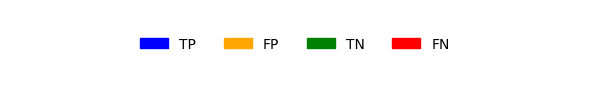

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the legend elements with placeholder colors and actual labels
legend_elements = [mpatches.Patch(color='blue', label='TP'),
                   mpatches.Patch(color='orange', label='FP'),
                   mpatches.Patch(color='green', label='TN'),
                   mpatches.Patch(color='red', label='FN')]

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(6, 1)) # Set a figure size that's wide and short

# Create the legend
# loc='center' places the legend in the middle of the figure
# ncol= number of columns the legend has, you can set it to the number of your labels
legend = ax.legend(handles=legend_elements, loc='center', ncol=4, frameon=False)

# Hide the axes
ax.axis('off')

# Adjust layout to make space for the long legend
fig.tight_layout()

# Display the legend on the screen
plt.show()

In [ ]:
import pandas as pd

# Load dataset
loan_data = pd.read_csv('dataset.csv')

# Display information about the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314095 entries, 0 to 314094
Data columns (total 37 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   derived_msa-md                            314095 non-null  int64  
 1   action_taken                              314095 non-null  int64  
 2   purchaser_type                            314095 non-null  int64  
 3   preapproval                               314095 non-null  int64  
 4   loan_type                                 314095 non-null  int64  
 5   loan_purpose                              314095 non-null  int64  
 6   lien_status                               314095 non-null  int64  
 7   reverse_mortgage                          314095 non-null  int64  
 8   open-end_line_of_credit                   314095 non-null  int64  
 9   loan_amount                               314095 non-null  float64
 10  hoepa_status        

                                          derived_msa-md  purchaser_type  \
derived_msa-md                                  1.000000       -0.020940   
purchaser_type                                 -0.020940        1.000000   
preapproval                                    -0.000935       -0.034269   
loan_type                                       0.048879        0.201584   
loan_purpose                                    0.011271       -0.109035   
lien_status                                    -0.041975       -0.166653   
reverse_mortgage                                     NaN             NaN   
open-end_line_of_credit                         0.016822        0.189028   
loan_amount                                    -0.043040        0.044915   
hoepa_status                                    0.002053       -0.135009   
loan_term                                      -0.039898        0.107879   
negative_amortization                          -0.001325        0.000764   
interest_onl

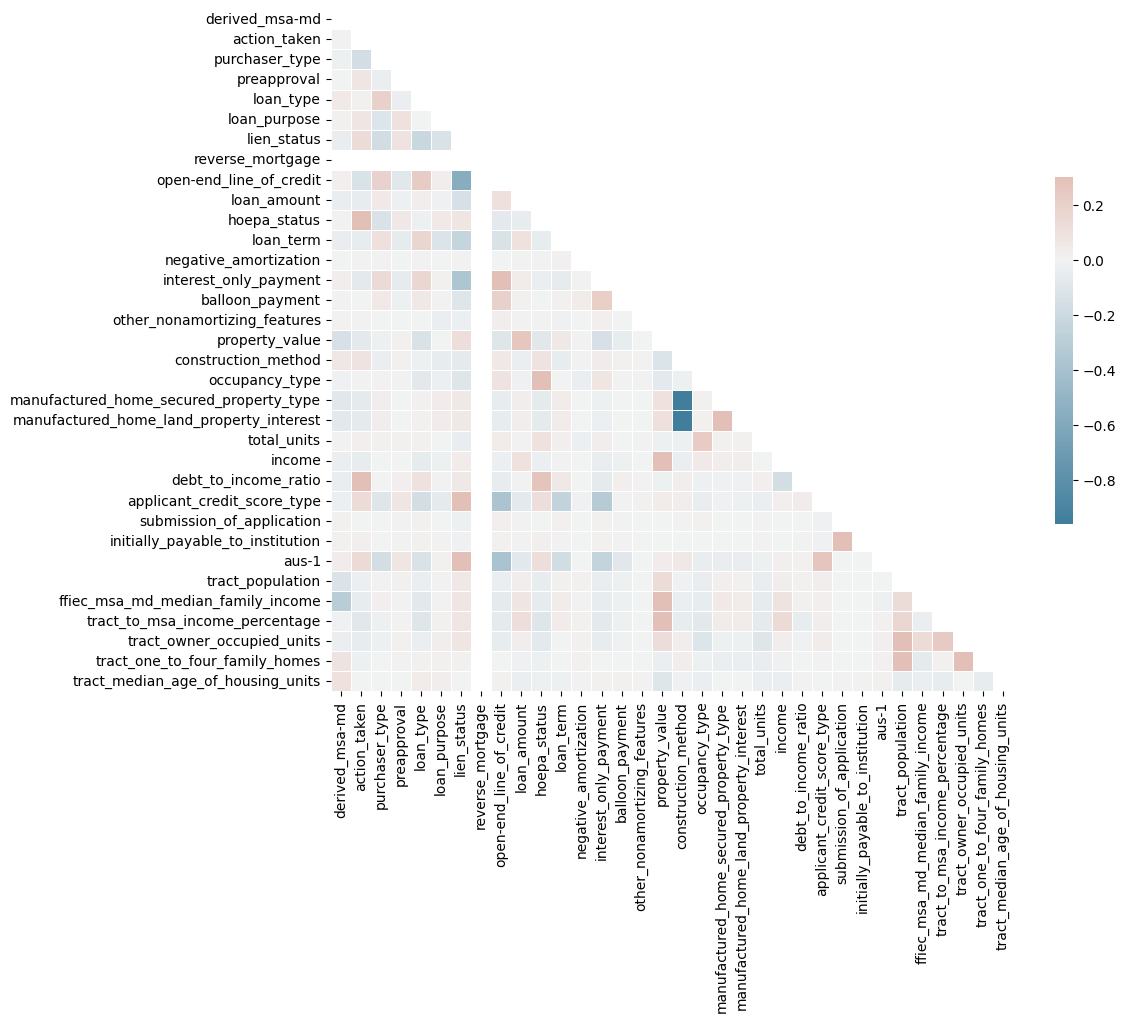

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
import numpy as np

# Load dataset
loan_data = pd.read_csv('dataset.csv')  # Make sure this path is correct in your actual code

# Drop the protected attributes for model training
protected_attributes = ['applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']
loan_data_modeling = loan_data.drop(columns=protected_attributes)

# Convert the target variable to binary if necessary
# Define a mapping based on your specific case. Assuming 'action_taken' is either '1' or '3'
mapping = {1: 0, 3: 1}
loan_data_modeling['action_taken'] = loan_data_modeling['action_taken'].map(mapping)

# Ensure all necessary columns are included and properly preprocessed for correlation analysis
# Assuming 'loan_data_modeling' now contains only the columns we want to correlate
numerical_cols = loan_data_modeling.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('action_taken')  # Remove the target variable from the list of numerical columns

# Now we can compute the correlation matrix
correlation_matrix = loan_data_modeling[numerical_cols].corr()

# If you want to see the correlation with respect to the target variable, include it as well
full_correlation_matrix = loan_data_modeling[numerical_cols + ['action_taken']].corr()

# Output the correlation matrix to a CSV file for convenience if needed
correlation_matrix.to_csv('correlation_matrix.csv')
full_correlation_matrix.to_csv('full_correlation_matrix.csv')

# Display the full correlation matrix
print(full_correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'loan_data_modeling' is a Pandas DataFrame with the relevant numerical features

# Compute the correlation matrix
corr = loan_data_modeling.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the heatmap
plt.show()


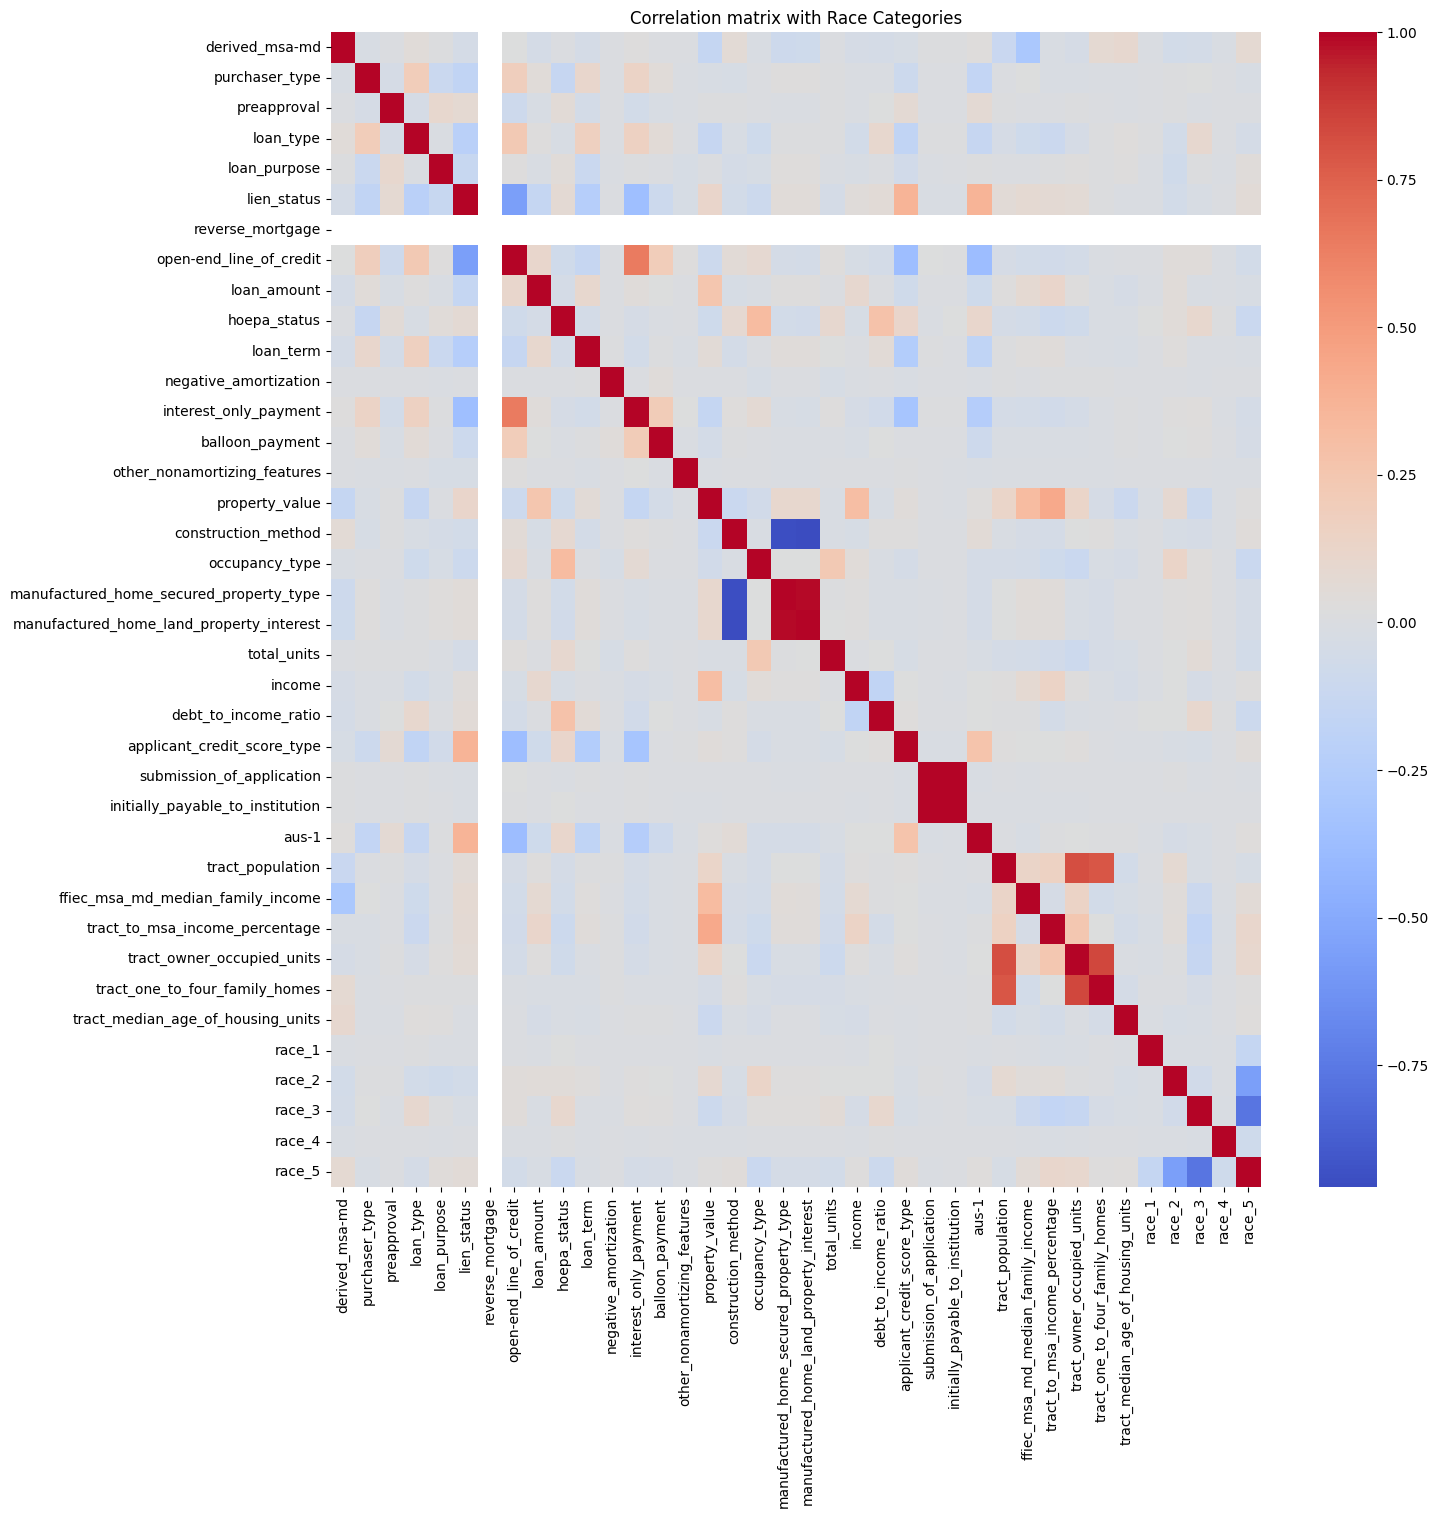

In [ ]:
# Create dummy variables for the 'applicant_race-1' feature correctly
race_dummies = pd.get_dummies(loan_data['applicant_race-1'], prefix='race')

# Now we add the dummy variables for 'applicant_race-1' to the DataFrame, loan_data
# And ensure we don't include 'applicant_race-1' in our analysis since we now have it in dummy form
loan_data = pd.concat([loan_data.drop('applicant_race-1', axis=1), race_dummies], axis=1)

# List of all features for correlation matrix excluding the 'action_taken' and protected attributes
all_features_except_protected = [
    'derived_msa-md', 'purchaser_type', 'preapproval', 'loan_type',
    'loan_purpose', 'lien_status', 'reverse_mortgage', 'open-end_line_of_credit',
    'loan_amount', 'hoepa_status', 'loan_term', 'negative_amortization',
    'interest_only_payment', 'balloon_payment', 'other_nonamortizing_features',
    'property_value', 'construction_method', 'occupancy_type',
    'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest',
    'total_units', 'income', 'debt_to_income_ratio', 'applicant_credit_score_type',
    'submission_of_application', 'initially_payable_to_institution', 'aus-1',
    'tract_population', 'ffiec_msa_md_median_family_income',
    'tract_to_msa_income_percentage', 'tract_owner_occupied_units',
    'tract_one_to_four_family_homes', 'tract_median_age_of_housing_units'
] + race_dummies.columns.tolist()  # add race dummy columns to the list

# Create a new DataFrame with the selected features for correlation analysis
selected_data_for_correlation = loan_data[all_features_except_protected]

# Compute the correlation matrix for all variables including race dummies
correlation_matrix = selected_data_for_correlation.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))  # You might need to adjust the size to fit all features comfortably
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix with Race Categories")
plt.xticks(rotation=90)  # Rotate x labels for better readability if needed
plt.yticks(rotation=0)
plt.show()


In [ ]:
unique_races = loan_data['applicant_race-1'].unique()
unique_races.sort()  # Sort the values if necessary, to understand the order
print("Unique race values:", unique_races)

Unique race values: [1 2 3 4 5]
